## Theano basics

In [26]:
import theano 
import theano.tensor as T
from IPython.display import SVG
import numpy as np

### Variables

In [3]:
x = T.lscalar()
x

<TensorType(int64, scalar)>

In [7]:
y = 3*x + 3
type(y)

theano.tensor.var.TensorVariable

In [8]:
y

Elemwise{add,no_inplace}.0

In [9]:
theano.pprint(y)

'((TensorConstant{3} * <TensorType(int64, scalar)>) + TensorConstant{3})'

In [10]:
theano.printing.debugprint(y)

Elemwise{add,no_inplace} [id A] ''   
 |Elemwise{mul,no_inplace} [id B] ''   
 | |TensorConstant{3} [id C]
 | |<TensorType(int64, scalar)> [id D]
 |TensorConstant{3} [id C]


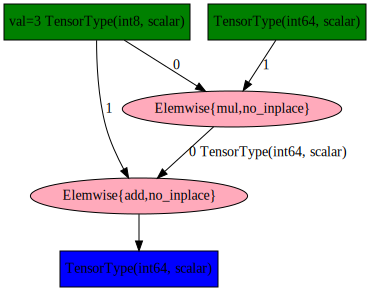

In [13]:
SVG(theano.printing.pydotprint(y,return_image=True,format='svg'))

### Evaluating expression

In [14]:
y.eval({x: 3})

array(12)

compiling the function

In [15]:
f = theano.function([x],y)

In [16]:
f(3)

array(12)

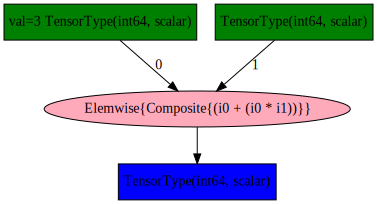

In [17]:
SVG(theano.printing.pydotprint(f,return_image=True, format='svg'))

#### various tensor types

In [18]:
x = T.vector()
x

<TensorType(float64, vector)>

In [19]:
x = T.matrix()
x

<TensorType(float64, matrix)>

In [20]:

x = T.tensor3()
x

<TensorType(float64, 3D)>

In [21]:
x = T.tensor4()
x

<TensorType(float64, 4D)>

## Gradient

In [22]:
x = T.scalar()
y = T.log(x)

In [23]:
gradient = T.grad(y,x)

In [25]:
gradient.eval({x:2}) #log x gradient will be 1/x so 1/2 is 0.5

array(0.5)

## shared variable 
### symbolic + storage 

In [27]:
x =  theano.shared(np.zeros((2,3),dtype = theano.config.floatX))

In [28]:
x

<TensorType(float64, matrix)>

In [31]:
# printting value 
values = x.get_value(x)
print values.shape
print values

(2, 3)
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [33]:
x.set_value(values)

In [38]:
(x+2)**2

Elemwise{pow,no_inplace}.0

In [39]:
((x+2)**2).eval()

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.]])

In [41]:
theano.function([],((x+2)**2))()

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.]])

## updates

In [42]:
count = theano.shared(0)
new_count = count + 1 
updates = {count :  new_count}

In [49]:
h = theano.function([],count,updates=updates)

In [50]:
h()

array(1)

In [52]:
h()

array(2)

In [53]:
h()

array(3)